In [1]:
import pandas as pd
from path import Path 
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
file = Path('crypto_data.csv')

In [4]:
df = pd.read_csv(file, index_col=0)
df.head()

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [5]:
#list all algorithms in use
algorithms = set(df.Algorithm.values)
print(algorithms)

{'CryptoNight-V7', 'vDPOS', 'SHA-256D', 'Slatechain', 'X14', 'Ethash', 'ScryptOG', 'Skein', 'Blake', 'QUAIT', 'Argon2d', 'YescryptR16', 'Momentum', 'Tribus', 'NIST5', 'C11', 'Blake2S', 'Exosis', 'Groestl', 'Curve25519', 'POS 3.0', 'Zhash', 'M7 POW', 'PHI2', 'SHA-256', 'XEVAN', 'QuarkTX', 'Quark', 'Dagger-Hashimoto', 'PoS', 'SHA3-256', 'Lyra2RE', 'Equihash+Scrypt', 'T-Inside', 'Blake2b', 'Dagger', 'VBFT', 'X11GOST', 'POS 2.0', 'CryptoNight Heavy', 'X16R', 'Lyra2REv2', 'CryptoNight', 'Equihash1927', 'SkunkHash', 'Time Travel', 'Progressive-n', 'Cloverhash', 'SHA-512', 'Cryptonight-GPU', 'XG Hash', 'Semux BFT consensus', 'X15', 'M00N', 'Leased POS', 'Scrypt', 'Counterparty', 'Jump Consistent Hash', 'X16S', 'Stanford Folding', 'Ouroboros', 'Equihash', 'X11', 'Wild Keccak', 'VeChainThor Authority', 'TRC10', 'DPoS', 'PHI1612', 'Keccak', 'Green Protocol', 'CryptoNight Heavy X', 'BLAKE256', 'HMQ1725', 'Multiple', '1GB AES Pattern Search', 'SHA3', 'HybridScryptHash256', 'X13', 'Argon2', 'Shabal

In [6]:
#print the counts of stocks being currently traded vs. not being currently traded
df["IsTrading"].value_counts()

True     1144
False     108
Name: IsTrading, dtype: int64

In [7]:
#select only cryptocurrencies that are being traded
df = df.loc[df["IsTrading"]==True]
df["IsTrading"].value_counts()

True    1144
Name: IsTrading, dtype: int64

In [8]:
#delete the IsTrading column; no longer necessary to keep
df = df.drop("IsTrading", axis = 1)
df.head()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
365,365Coin,X11,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,PoW,NaN,611000
808,808,SHA-256,PoW/PoS,0.000000e+00,0


In [9]:
#delete all rows with null values
df = df.dropna(axis=0, how='any')
df.shape

(685, 5)

In [10]:
#sort values in TotalCoinsMined to identify negative or zero values
df.TotalCoinsMined.sort_values()

FIII   -5.917978e+09
LBTC    0.000000e+00
RIPO    0.000000e+00
BASH    0.000000e+00
CSH     0.000000e+00
            ...     
QWC     9.955311e+10
NYC     1.430067e+11
GCN     1.630551e+11
BCN     1.840668e+11
BTT     9.899887e+11
Name: TotalCoinsMined, Length: 685, dtype: float64

In [11]:
#select only rows with positive TotalCoinsMined values
df = df[df['TotalCoinsMined']>0]
len(df)

532

In [12]:
#delete te CoinName column from the original dataframe
df = df.drop("CoinName", axis = 1)
df.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethash,PoW,1.076842e+08,0


In [13]:
#create dummy variables for columns with string values
x = pd.get_dummies(data=df, columns=["Algorithm","ProofType"])
print(x.shape)
x.head()

(532, 98)


,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
42,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
#standardize the data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [15]:
#print the scaled data
x_scaled[0]

array([-0.11710817, -0.1528703 , -0.0433963 , -0.0433963 , -0.0433963 ,
       -0.06142951, -0.07530656, -0.0433963 , -0.06142951, -0.06142951,
       -0.0433963 , -0.0433963 , -0.19245009, -0.06142951, -0.09740465,
       -0.0433963 , -0.11547005, -0.07530656, -0.0433963 , -0.0433963 ,
       -0.15191091, -0.0433963 , -0.13118084, -0.0433963 , -0.0433963 ,
       -0.08703883, -0.0433963 , -0.0433963 , -0.0433963 , -0.0433963 ,
       -0.06142951, -0.0433963 , -0.08703883, -0.08703883, -0.08703883,
       -0.0433963 , -0.13118084, -0.13840913, -0.13840913, -0.0433963 ,
       -0.06142951, -0.0433963 , -0.07530656, -0.18168574, -0.0433963 ,
       -0.0433963 , -0.0433963 , -0.07530656, -0.15826614, -0.31491833,
       -0.0433963 , -0.08703883, -0.07530656, -0.06142951,  1.38675049,
       -0.0433963 , -0.0433963 , -0.06142951, -0.0433963 , -0.0433963 ,
       -0.0433963 , -0.0433963 , -0.0433963 , -0.0433963 , -0.0433963 ,
       -0.0433963 , -0.39879994, -0.0433963 , -0.18168574, -0.04

In [16]:
#identify the number of rows and oclumns in the scaled data
x_scaled.shape

(532, 98)

In [17]:
#with 99% of the data
pca = PCA(n_components=0.99)
prin_components = pca.fit_transform(x_scaled)
prin_components.shape

(532, 86)

In [18]:
pca.explained_variance_.sum()

97.3513331507576

In [19]:
#reduce the dimensions with PCA
pca = PCA(n_components=0.90)
prin_components = pca.fit_transform(x_scaled)
prin_components.shape

(532, 74)

In [20]:
#the sum of the explained variance of the principal components
pca.explained_variance_.sum()

88.4728345756615

In [21]:
#reduce the dimensions with T-SNE
tsnel = TSNE(perplexity=50)
tsnelFeatures = tsnel.fit_transform(prin_components)
tsnelFeatures.shape

/Users/rohansmith/opt/anaconda3/envs/roenv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/rohansmith/opt/anaconda3/envs/roenv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(532, 2)

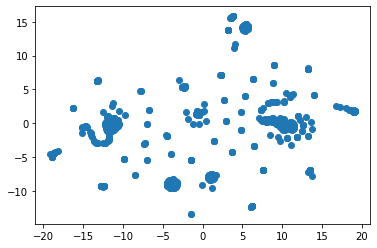

In [22]:
#plot t-SNE output
x = tsnelFeatures[:,0]
y = tsnelFeatures[:,1]

plt.scatter(x,y)
plt.show()

In [23]:
#identify the cluster with k-means
inertia = []
k = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

for value in k:
    kmeans = KMeans(n_clusters = value, random_state = 0)
    kmeans.fit(prin_components)
    inertia.append(kmeans.inertia_)

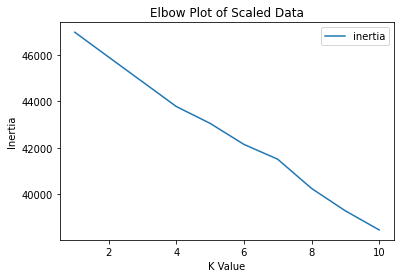

In [24]:
elbowPlot = pd.DataFrame({"K": k,"inertia": inertia})
elbowPlot.plot.line(x = "K", y = "inertia")
plt.ylabel("Inertia")
plt.xlabel ("K Value")
plt.title ("Elbow Plot of Scaled Data")
plt.show()